[1, 7, 4, 3, 6, 9, 5, 2, 8, 0]


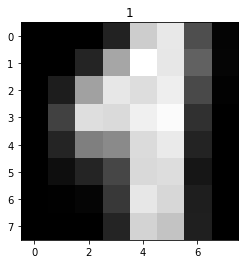

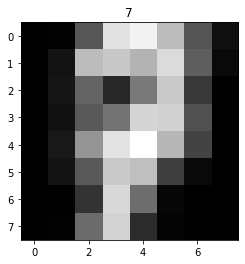

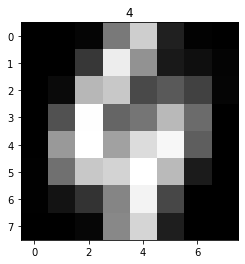

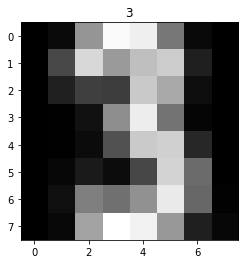

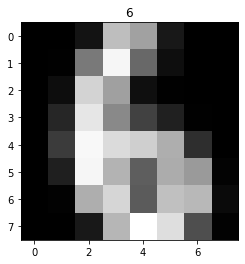

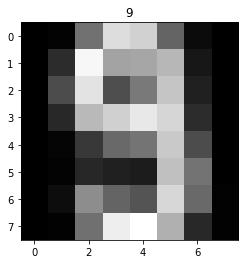

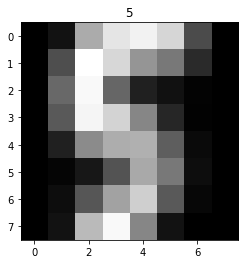

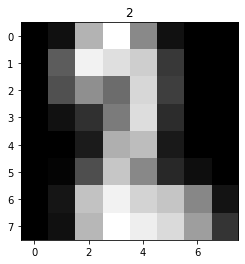

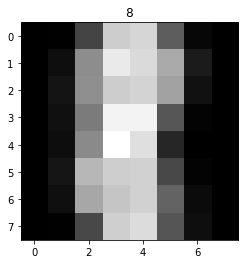

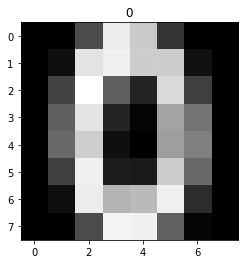

In [10]:
#1
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

def plot_dig(i):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title('This is {}'.format(digits.target[i]))
    plt.show()
    
def get_labels(digits, centroids, k):
    dist = np.linalg.norm(digits-centroids[0], axis = 1).reshape(-1,1)
    for i in range(1,k):
        dist_i = np.linalg.norm(digits-centroids[i],axis=1).reshape(-1,1)
        dist = np.hstack([dist, dist_i])
    labels = np.argmin(dist,axis=1)
    return labels

def prev_digit(digits, labels, k):
    digs = []
    for i in range(k):
        mask = (labels == i)
        A = [digits.target[mask]]
        unique, pos = np.unique(A, return_inverse = True)
        counts = np.bincount(pos)
        maxpos = counts.argmax()   
        digs.append(unique[maxpos])
    return digs


from sklearn.datasets import load_digits
digits = load_digits()
digits_64 = digits.images.reshape(digits.images.shape[0],64)

centroids, delta = kmeans(digits_64, 10)
labels = get_labels(digits_64, centroids, 10)

ass_digs = prev_digit(digits, labels, 10)
print(ass_digs)

for i in range(10):
    plt.imshow(centroids[i].reshape((8,8)), cmap='gray')
    plt.title(ass_digs[i])
    plt.show()

In [12]:
def error_rate(k):
    q = 0
    for i in range(1797):
        if((digits.target[i] == k) and (digits.target[i] != ass_digs[labels[i]])):
                q += 1
    return q
for i in range(10):
    print("error rate for ", i, " =" , error_rate(i) / 1797)

error rate for  0  = 0.0005564830272676684
error rate for  1  = 0.07067334446299388
error rate for  2  = 0.016138007790762382
error rate for  3  = 0.015581524763494713
error rate for  4  = 0.010573177518085699
error rate for  5  = 0.025598219254312743
error rate for  6  = 0.0022259321090706734
error rate for  7  = 0.0022259321090706734
error rate for  8  = 0.04006677796327212
error rate for  9  = 0.022815804117974403


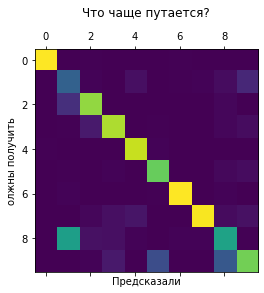

Conclusions: mostly 1, 8, 5, 9 are confused
 0, 6, 7 are better recognised


In [11]:
#3
def confusions(digits, labels, i, j):
    q = 0
    for k in range(1797):
        if (ass_digs[labels[k]] == i and digits.target[k] == j):
            q+=1
    return q

a=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        a[i][j] = confusions(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Что чаще путается?\n")
plt.xlabel("Предсказали")
plt.ylabel("Должны получить")
plt.show()
# Из таблицы в задании 2 и матрицы в задании 3 видно, что плохо определяются числа 1 (можно принять за 9), 5,
# 8(можно принять за 1) и 9 (можно принять за 5 и 8)

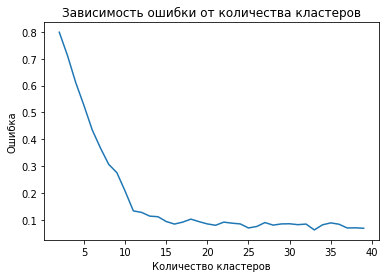

In [15]:
#4

errors=[]
for k in range(2,40):
    sum_err = 0
    centroids, delta = kmeans(digits_64, k)
    labels = get_labels(digits_64, centroids, k)
    ass_digs = prev_digit(digits, labels, k)
    for i in range(10):
        sum_err += error_rate(i)
    errors.append(sum_err / 1797)
arr=np.arange(2,40)

plt.plot(arr,errors)
plt.title("Зависимость ошибки от количества кластеров")
plt.xlabel("Количество кластеров")
plt.ylabel("Ошибка")
plt.show()

# Из графика видно, что при количестве кластеров менее 11 ошибка достаточно большая, а начиная с 11 
# стабиилизируется и меняется не сильно. Более того, при количестве кластеров 37 принимает наименьшее значение. 
# Но 37 - слишком много, при 18 кластерах (в 2 раза меньше!!) разница будет незначительной. 

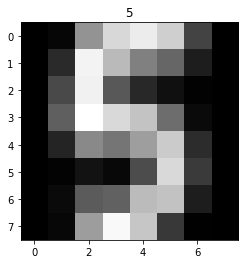

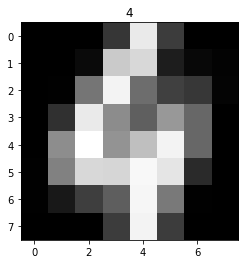

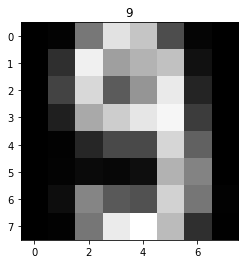

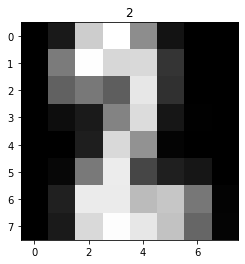

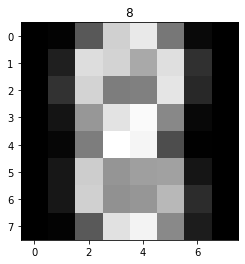

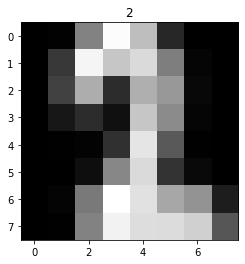

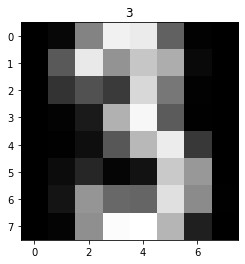

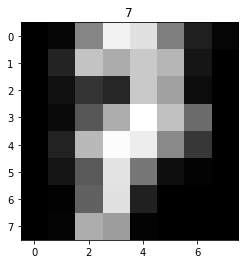

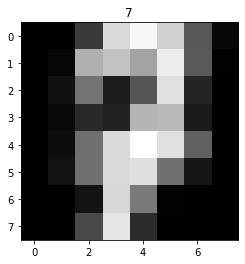

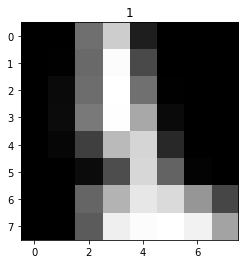

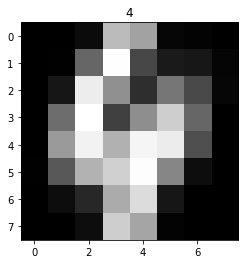

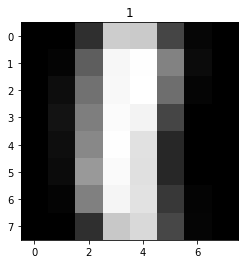

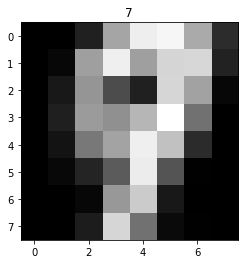

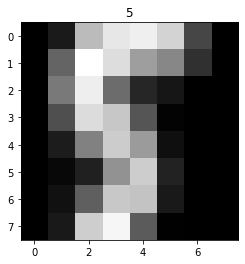

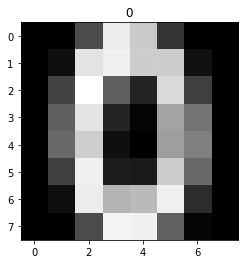

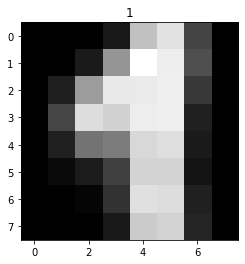

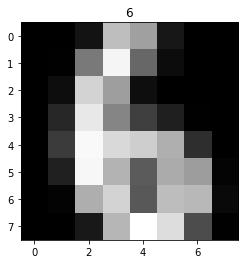

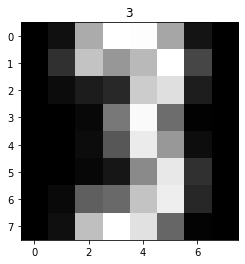

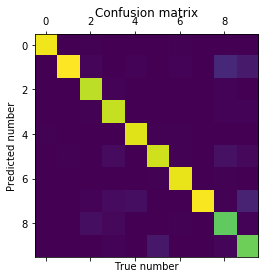

In [14]:
#5
k = 18
centroids, delta = kmeans(digits_64, k)
labels = get_labels(digits_64, centroids, k)    
ass_digs = prev_digit(digits, labels, k)
for i in range(k):
    plt.imshow(centroids[i].reshape((8,8)), cmap='gray')
    plt.title(ass_digs[i])        
    plt.show()

a=np.zeros((10,10))
for i in range(10):
    for j in range(10):
        a[i][j] = confusions(digits,labels,i,j)
        
plt.matshow(a)
plt.title("Confusion matrix")
plt.xlabel("True number")
plt.ylabel("Predicted number")
plt.show()  
#Мы видим, что матрица стала гораздо лучше, нет сильных отклонений. На те цифры, которые чаще путались, 
#теперь больше кластеров. 
